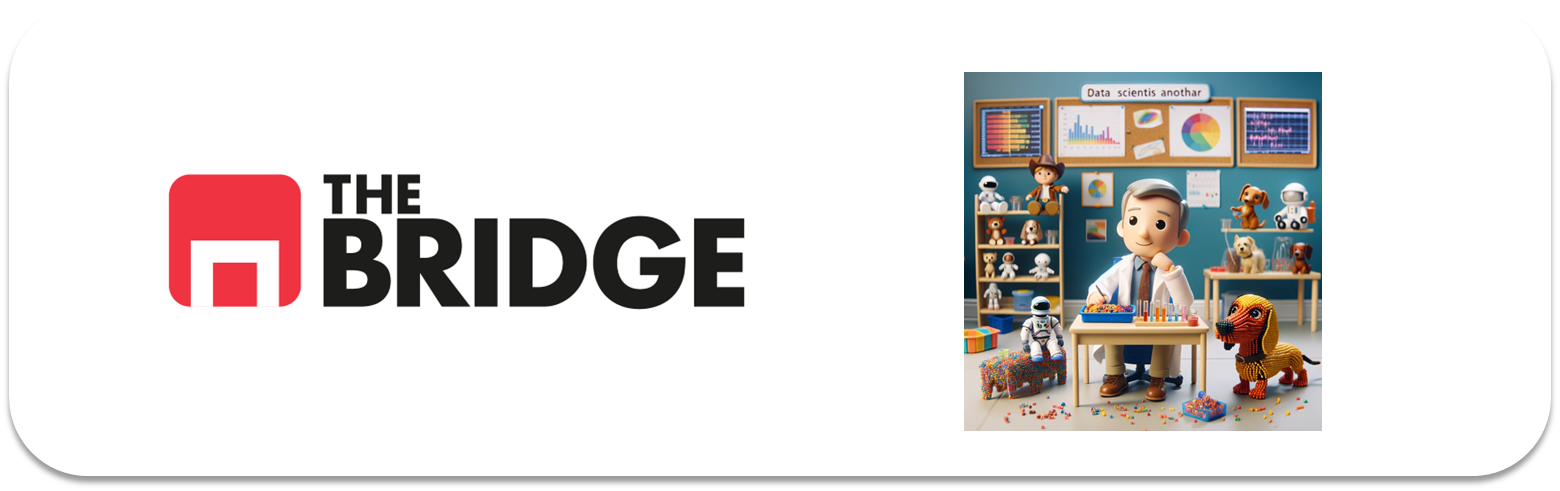

## PRACTICA OBLIGATORIA: ANÁLISIS UNIVARIANTE

* La práctica obligatoria de esta unidad consiste en hacer el análisis univariante completo de un dataset con el que acabarás muy familiarizado, el manifiesto de pasajeros del Titanic. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook. Te dejo una que vas a necesitar sí o sí

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### #1 Preparación


### #1.1


Carga en un dataframe los datos del titanic a partir de un dataset de seaborn. Para ello:

* ejecuta ```python sns.get_dataset_names()```
* localiza el nombre que puede ser el adecuado para el ejercicio
* Asigna la salida de ```sns.load_dataset(<nombre_del_dataset>)``` a una variable "df_titanic"

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [3]:
df_titanic = sns.load_dataset("titanic")

### #1.2

Muestra una porción del dataset ("df_titanic") y su info general. ¿Hay nulos?

In [4]:
df_titanic.info()
df_titanic.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
df_titanic.value_counts(dropna = False) # Nos permite identificar las columnas con valores nulos.

survived  pclass  sex     age   sibsp  parch  fare     embarked  class   who    adult_male  deck  embark_town  alive  alone
0         3       male    NaN   0      0      7.8958   S         Third   man    True        NaN   Southampton  no     True     13
                                              8.0500   S         Third   man    True        NaN   Southampton  no     True     12
                                              7.7500   Q         Third   man    True        NaN   Queenstown   no     True      8
1         3       female  NaN   0      0      7.7500   Q         Third   woman  False       NaN   Queenstown   yes    True      7
0         2       male    NaN   0      0      0.0000   S         Second  man    True        NaN   Southampton  no     True      6
                                                                                                                               ..
1         3       male    NaN   0      0      7.7750   S         Third   man    True        NaN 

In [6]:
df_titanic[df_titanic["age"].isna()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
17,1,2,male,NaN,0,0,13.0000,S,Second,man,True,NaN,Southampton,yes,True
19,1,3,female,NaN,0,0,7.2250,C,Third,woman,False,NaN,Cherbourg,yes,True
26,0,3,male,NaN,0,0,7.2250,C,Third,man,True,NaN,Cherbourg,no,True
28,1,3,female,NaN,0,0,7.8792,Q,Third,woman,False,NaN,Queenstown,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,7.2292,C,Third,man,True,NaN,Cherbourg,no,True
863,0,3,female,NaN,8,2,69.5500,S,Third,woman,False,NaN,Southampton,no,False
868,0,3,male,NaN,0,0,9.5000,S,Third,man,True,NaN,Southampton,no,True
878,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True


In [7]:
df_titanic[df_titanic["embarked"].isna()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True


In [8]:
df_titanic[df_titanic["deck"].isna()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,0,3,male,25.0,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False


In [9]:
df_titanic[df_titanic["embark_town"].isna()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True


### #1.3

Obtén el porcentaje de nulos y decide que hacer con las columnas con nulos y ejecútalo. Además deshazte de la columna "parch" que no la emplearemos.

In [10]:
df_titanic.isna().mean() * 100

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

### #1.4
Sobre el dataset "limpio". Rellena la tabla de descripción (muy breve) de lo que es cada columna en función de su nombre y los valores. Para ayudarte:
* Se trata del dataset que reune lo más parecido a un manifiesto de supervivientes y fallecidos en el viaje.
* sibsp: Es el numero de familiares que viajan con la persona indicada en el manifiesto (lista de pasajeros)
* embarked: Es la incial de la letra de la ciudad donde embarcó la persona.




| Columna/Variable | Descripción |
| ---------------- | ----------- |
| -       | - |



In [11]:
# Realizamos la limpieza del dataset adoptando la siguiente estrategia:
# 1. Eliminamos las columnas que no podemos reconstruir por el alto porcentaje de valores nulos, "deck".
df_titanic.drop(columns = ["deck"], inplace = True)
# 2. Eliminamos las filas que tienen valores nulos en las columnas "deck" y "embark_town". Son los pasajeros 61 y 829.
df_titanic.drop(index = [61, 829], inplace = True)
# 3. Imputamos la edad con la media de la edad de los pasajeros.
df_titanic["age_mean"] = df_titanic.groupby(["sex","class"], observed=True)["age"].transform("mean")
df_titanic["age_mean"] = df_titanic["age_mean"].apply(np.floor)
df_titanic.loc[df_titanic.age.isna(),"age"] = df_titanic.loc[df_titanic.age.isna(),"age_mean"]
df_titanic.drop(columns = ["age_mean"], inplace = True)

In [12]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     889 non-null    int64   
 1   pclass       889 non-null    int64   
 2   sex          889 non-null    object  
 3   age          889 non-null    float64 
 4   sibsp        889 non-null    int64   
 5   parch        889 non-null    int64   
 6   fare         889 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        889 non-null    category
 9   who          889 non-null    object  
 10  adult_male   889 non-null    bool    
 11  embark_town  889 non-null    object  
 12  alive        889 non-null    object  
 13  alone        889 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 86.1+ KB


| Columna/Variable | Descripción |
| ---------------- | ----------- |
| survived         | Refleja si el pasajero sobrevivió (1) o no (0) |
| pclass           | Clase del pasaje de forma numérica; 1, 2, 3 |
| sex              | Género del pasajero |
| age              | Edad del pasajero |
| sibsp            | (no consigo identificarlo) |
| parch            | (no consigo identificarlo) |
| fare             | Tarifa del pasaje |
| embarked         | Primera letra de la ciudad dónde embarcó el pasajero; (C)herbourg, (Q)ueenstown, (S)outhampton |
| class            | Clase del pasaje en formato texto; First, Second, Third |
| who              | Clasificación del pasajero; man, woman, child |
| adult_male       | Indica si el pasajero es un hombre adulto (1) o no (0)  |
| deck             | Cubierta del barco asociada al pasajero |
| embark_town      | Ciudad de embarque; Cherbourg, Queenstown, Southampton |
| alive            | Refleja si el passajero sobrevivió; yes, no |
| alone            | Refleja si el pasajero viajaba sólo; True, False |

### #1.5

Busca en internet las tres ciudades que visitó el Titanic antes de poner rumbo a su destino y llegar a alta mar. Cambia las iniciales por esos valores.

In [13]:
# Fuente: https://es.wikipedia.org/wiki/RMS_Titanic
# Southampton (Inglaterra) – punto de partida oficial.
# Cherburgo (Francia) – primera escala para recoger pasajeros.
# Queenstown (actualmente Cobh, Irlanda) – última parada antes de cruzar el Atlántico
def ciudades(inicial):
    if inicial == "S":
        return "Southampton"
    elif inicial == "C":
        return "Cherburgo"
    elif inicial == "Q":
        return "Queenstown"
    else:
        return inicial
df_titanic["embarked"] = df_titanic["embarked"].apply(ciudades)
df_titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,Southampton,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,Cherburgo,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,Southampton,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,Southampton,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,Southampton,Third,man,True,Southampton,no,True


### #2 Análisis

Sabiendo que el objetivo de nuestro análisis es hacer un estudio de la superviviencia y mortalidad en el viaje... Haz un análisis univariante completo y ordenado de las siguientes variables:
["survived","who","age","fare","class","embarked","alone"]
Nota: Si quieres añadir más, perfecto.

Separa el análisis en categóricas (incluyendo binarias) y numéricas. Muestra valores, gráficas y conclusiones/observaciones (2 o 3 por variable)

In [14]:
df_titanic.info()
df_titanic.head()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     889 non-null    int64   
 1   pclass       889 non-null    int64   
 2   sex          889 non-null    object  
 3   age          889 non-null    float64 
 4   sibsp        889 non-null    int64   
 5   parch        889 non-null    int64   
 6   fare         889 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        889 non-null    category
 9   who          889 non-null    object  
 10  adult_male   889 non-null    bool    
 11  embark_town  889 non-null    object  
 12  alive        889 non-null    object  
 13  alone        889 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 86.1+ KB


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,Southampton,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,Cherburgo,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,Southampton,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,Southampton,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,Southampton,Third,man,True,Southampton,no,True


In [17]:
def card_tipo(df,umbral_categoria = 10, umbral_continua = 30):
    df_temp = pd.DataFrame([df.nunique(), df.nunique()/len(df) * 100, df.dtypes])
    df_temp = df_temp.T
    df_temp = df_temp.rename(columns = {0: "Card", 1: "%_Card", 2: "Tipo"})

    df_temp.loc[df_temp.Card == 1, "%_Card"] = 0.00

    df_temp["tipo_sugerido"] = "Categorica"
    df_temp.loc[df_temp["Card"] == 2, "tipo_sugerido"] = "Binaria"
    df_temp.loc[df_temp["Card"] >= umbral_categoria, "tipo_sugerido"] = "Numerica discreta"
    df_temp.loc[df_temp["%_Card"] >= umbral_continua, "tipo_sugerido"] = "Numerica continua"

    return df_temp

In [19]:
df_tipo = card_tipo(df_titanic)
print(df_tipo)

            Card     %_Card      Tipo      tipo_sugerido
survived       2   0.224972     int64            Binaria
pclass         3   0.337458     int64         Categorica
sex            2   0.224972    object            Binaria
age           88   9.898763   float64  Numerica discreta
sibsp          7   0.787402     int64         Categorica
parch          7   0.787402     int64         Categorica
fare         247  27.784027   float64  Numerica discreta
embarked       3   0.337458    object         Categorica
class          3   0.337458  category         Categorica
who            3   0.337458    object         Categorica
adult_male     2   0.224972      bool            Binaria
embark_town    3   0.337458    object         Categorica
alive          2   0.224972    object            Binaria
alone          2   0.224972      bool            Binaria


| Columna/Variable | Descripción | Tipo de Variable | Importancia inicial | Nota |
|-|-|-|-|-|
| survived         | Refleja si el pasajero sobrevivió (1) o no (0) |Binaria|-|-|
| pclass           | Clase del pasaje de forma numérica; 1, 2, 3 |Categórica|-|-|
| sex              | Género del pasajero |binaria|-|-|
| age              | Edad del pasajero |Numérica discreta|-|-|
| sibsp            | (no consigo identificarlo) |Categórica|-|-|
| parch            | (no consigo identificarlo) |-|-|-|
| fare             | Tarifa del pasaje |-|-|-|
| embarked         | Primera letra de la ciudad dónde embarcó el pasajero; (C)herbourg, (Q)ueenstown, (S)outhampton |-|-|-|
| class            | Clase del pasaje en formato texto; First, Second, Third |-|-|-|
| who              | Clasificación del pasajero; man, woman, child |-|-|-|
| adult_male       | Indica si el pasajero es un hombre adulto (1) o no (0)  |-|-|-|
| deck             | Cubierta del barco asociada al pasajero |-|-|-|
| embark_town      | Ciudad de embarque; Cherbourg, Queenstown, Southampton |-|-|-|
| alive            | Refleja si el passajero sobrevivió; yes, no |-|-|-|
| alone            | Refleja si el pasajero viajaba sólo; True, False |-|-|-|

### #2.1 Categóricas

In [23]:
def pinta_distribucion_categoricas(df, columnas_categoricas, relativa=False, mostrar_valores=False):
    num_columnas = len(columnas_categoricas)
    num_filas = (num_columnas // 2) + (num_columnas % 2)
    fig, axes = plt.subplots(num_filas, 2, figsize=(15, 5 * num_filas))
    axes = axes.flatten() 
    for i, col in enumerate(columnas_categoricas):
        ax = axes[i]
        if relativa:
            total = df[col].value_counts().sum()
            serie = df[col].value_counts().apply(lambda x: x / total)
            sns.barplot(x=serie.index, y=serie, ax=ax, palette='viridis', hue = serie.index, legend = False)
            ax.set_ylabel('Frecuencia Relativa')
        else:
            serie = df[col].value_counts()
            sns.barplot(x=serie.index, y=serie, ax=ax, palette='viridis', hue = serie.index, legend = False)
            ax.set_ylabel('Frecuencia')
        ax.set_title(f'Distribución de {col}')
        ax.set_xlabel('')
        ax.tick_params(axis='x', rotation=45)
        if mostrar_valores:
            for p in ax.patches:
                height = p.get_height()
                ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), 
                            ha='center', va='center', xytext=(0, 9), textcoords='offset points')
    for j in range(i + 1, num_filas * 2):
        axes[j].axis('off')
    plt.tight_layout()
    plt.show()


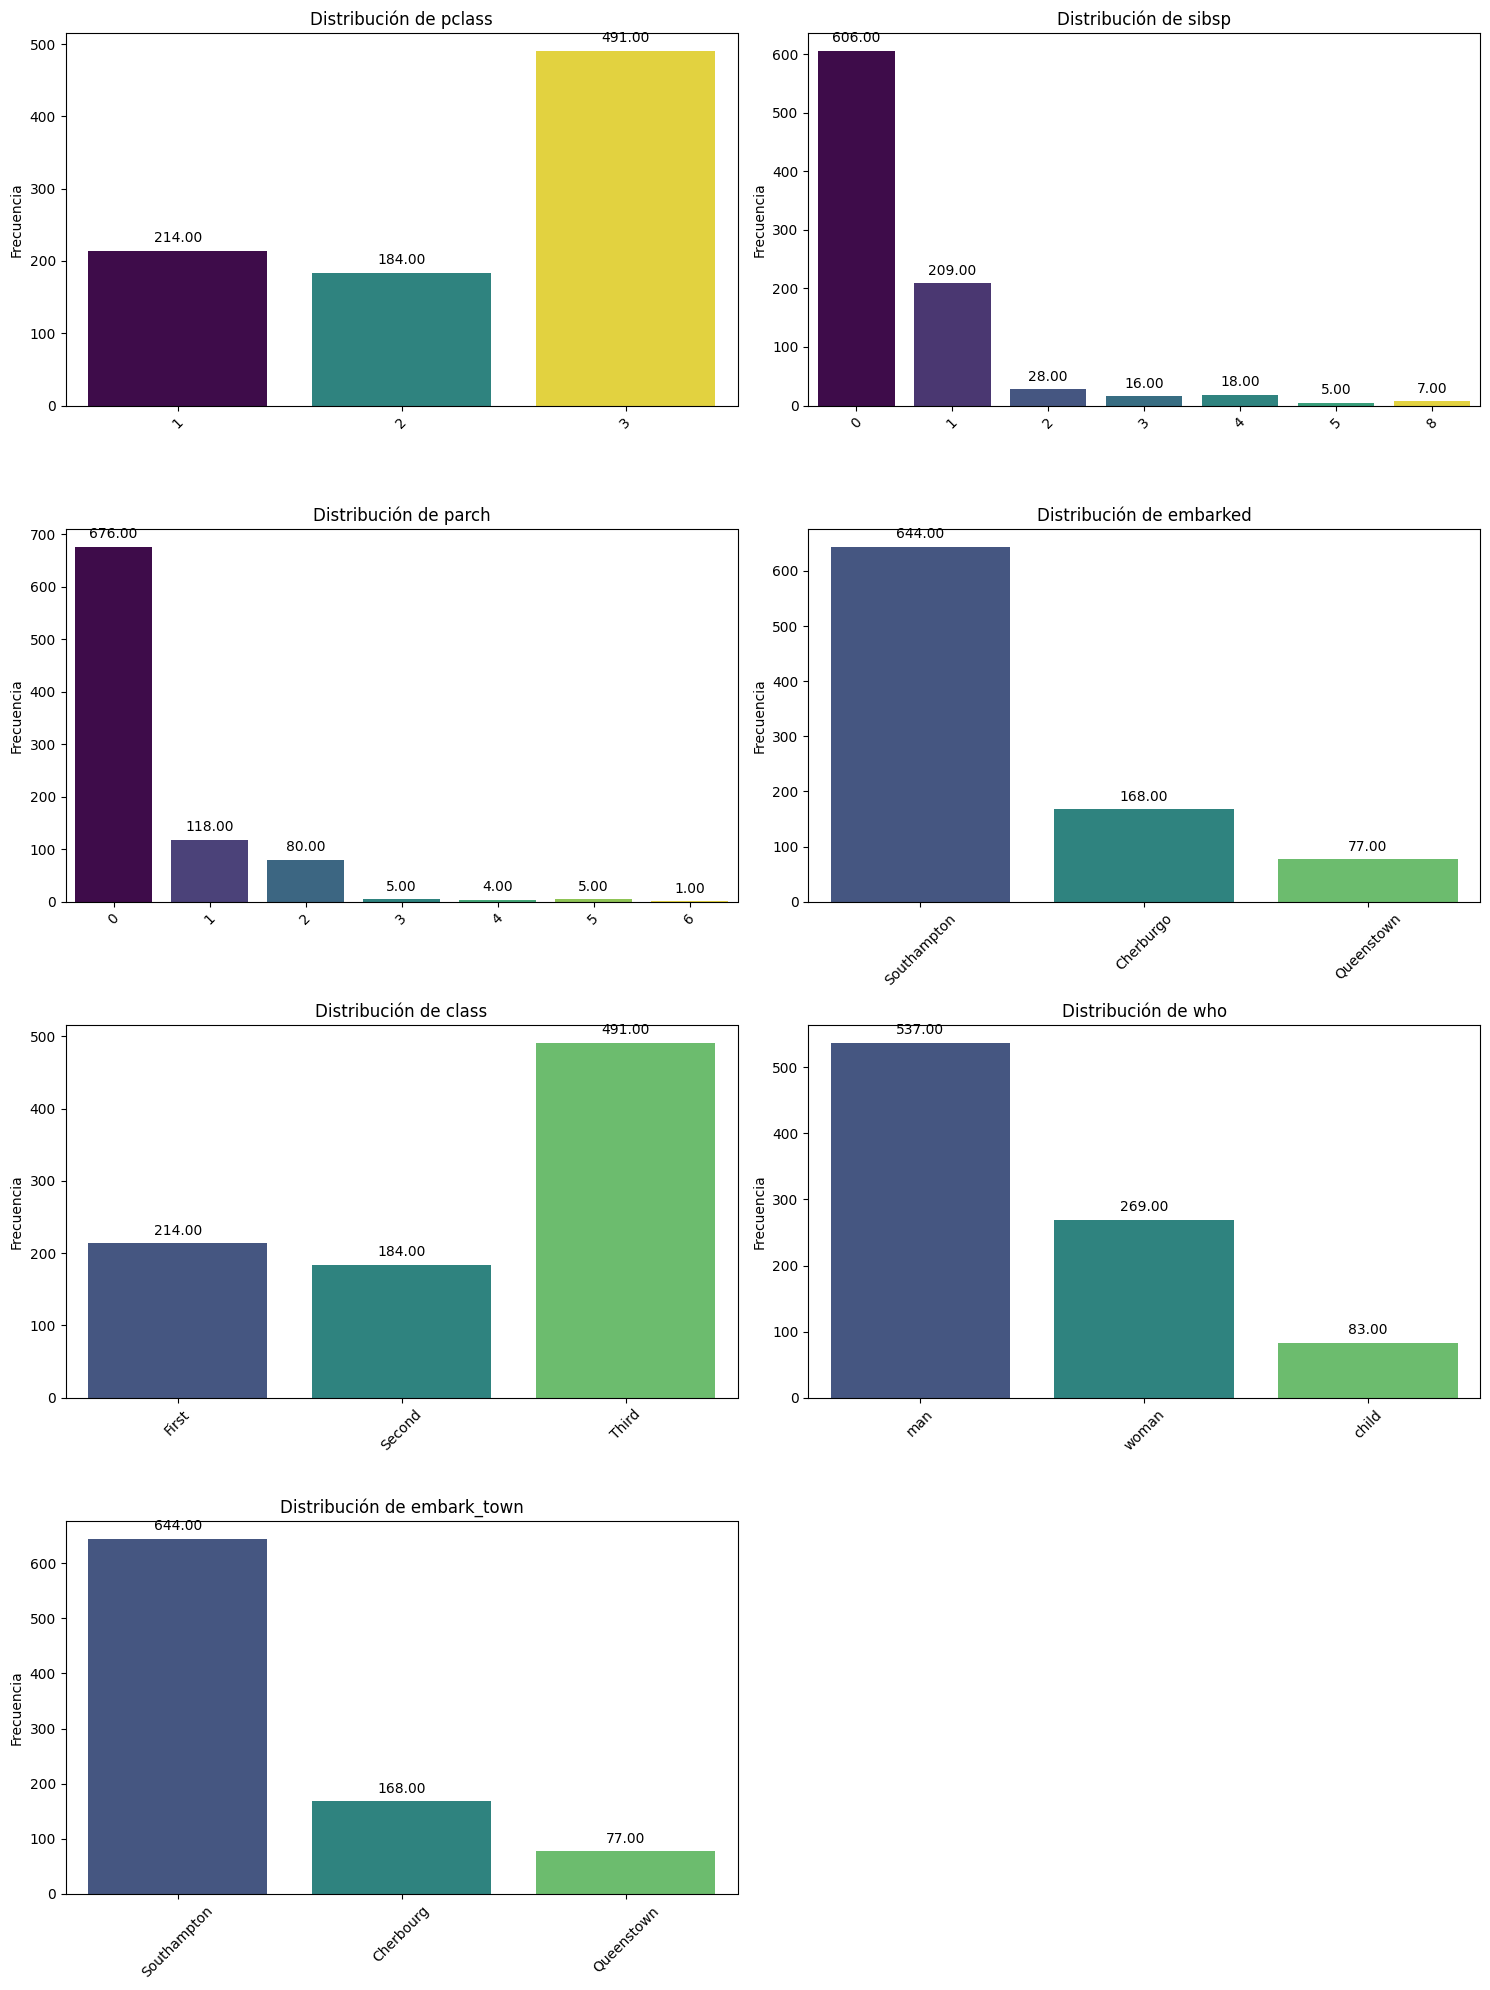

In [24]:
categoricas = df_tipo[df_tipo['tipo_sugerido'] == 'Categorica'].index.tolist()
pinta_distribucion_categoricas(df_titanic, categoricas, mostrar_valores= True)

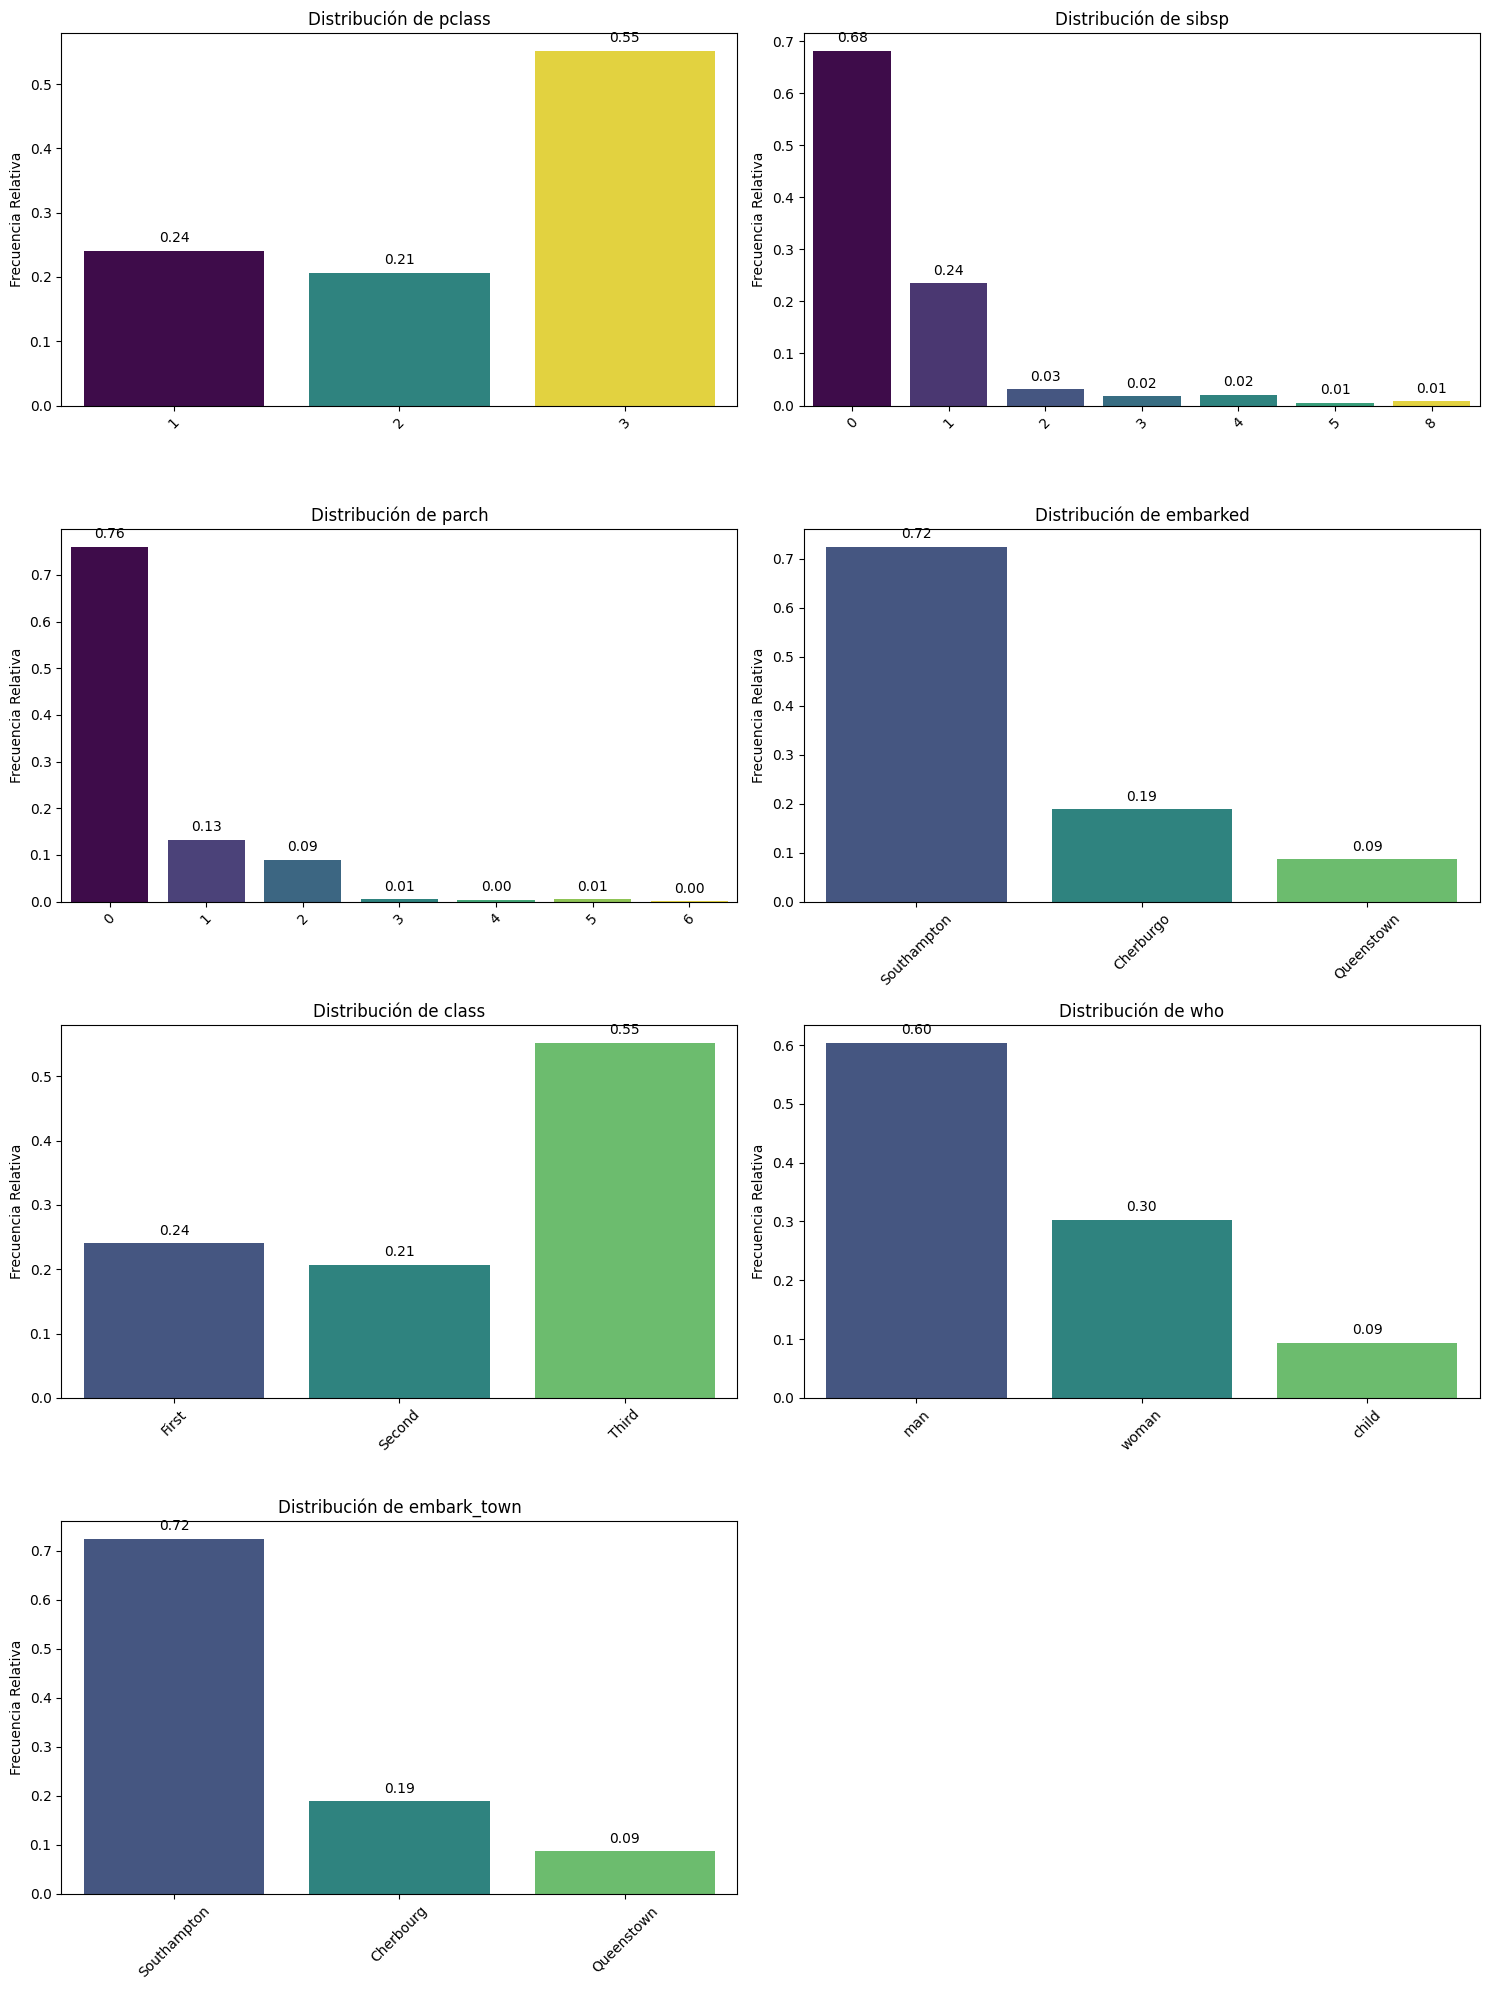

In [25]:
pinta_distribucion_categoricas(df_titanic, categoricas,relativa= True, mostrar_valores= True)

### #2.2 Numéricas

In [26]:
df_titanic[["age","fare"]].describe()

,age,fare
count,889.000000,889.000000
mean,29.161046,32.096681
std,13.271530,49.697504
min,0.420000,0.000000
25%,21.000000,7.895800
50%,26.000000,14.454200
75%,36.000000,31.000000
max,80.000000,512.329200


In [27]:
# Obtenemos sus CVs:
def get_CV(df, columna):
    columna = [columna] if type(columna) == str else columna
    return df[columna].describe().T["std"]/df[columna].describe().T["mean"] * 100

In [28]:
get_CV(df_titanic,"age")

age    45.511159
dtype: float64

In [29]:
get_CV(df_titanic,"fare")

fare    154.836896
dtype: float64

In [33]:
def plot_combined_graphs(df, columns, whisker_width=1.5, bins = None):
    num_cols = len(columns)
    if num_cols:
        fig, axes = plt.subplots(num_cols, 2, figsize=(12, 5 * num_cols))
        print(axes.shape)
        for i, column in enumerate(columns):
            if df[column].dtype in ['int64', 'float64']:
                # Histograma y KDE
                sns.histplot(df[column], kde=True, ax=axes[i,0] if num_cols > 1 else axes[0], bins= "auto" if not bins else bins)
                if num_cols > 1:
                    axes[i,0].set_title(f'Histograma y KDE de {column}')
                else:
                    axes[0].set_title(f'Histograma y KDE de {column}')

                # Boxplot
                sns.boxplot(x=df[column], ax=axes[i,1] if num_cols > 1 else axes[1], whis=whisker_width)
                if num_cols > 1:
                    axes[i,1].set_title(f'Boxplot de {column}')
                else:
                    axes[1].set_title(f'Boxplot de {column}')

        plt.tight_layout()
        plt.show()

(2, 2)


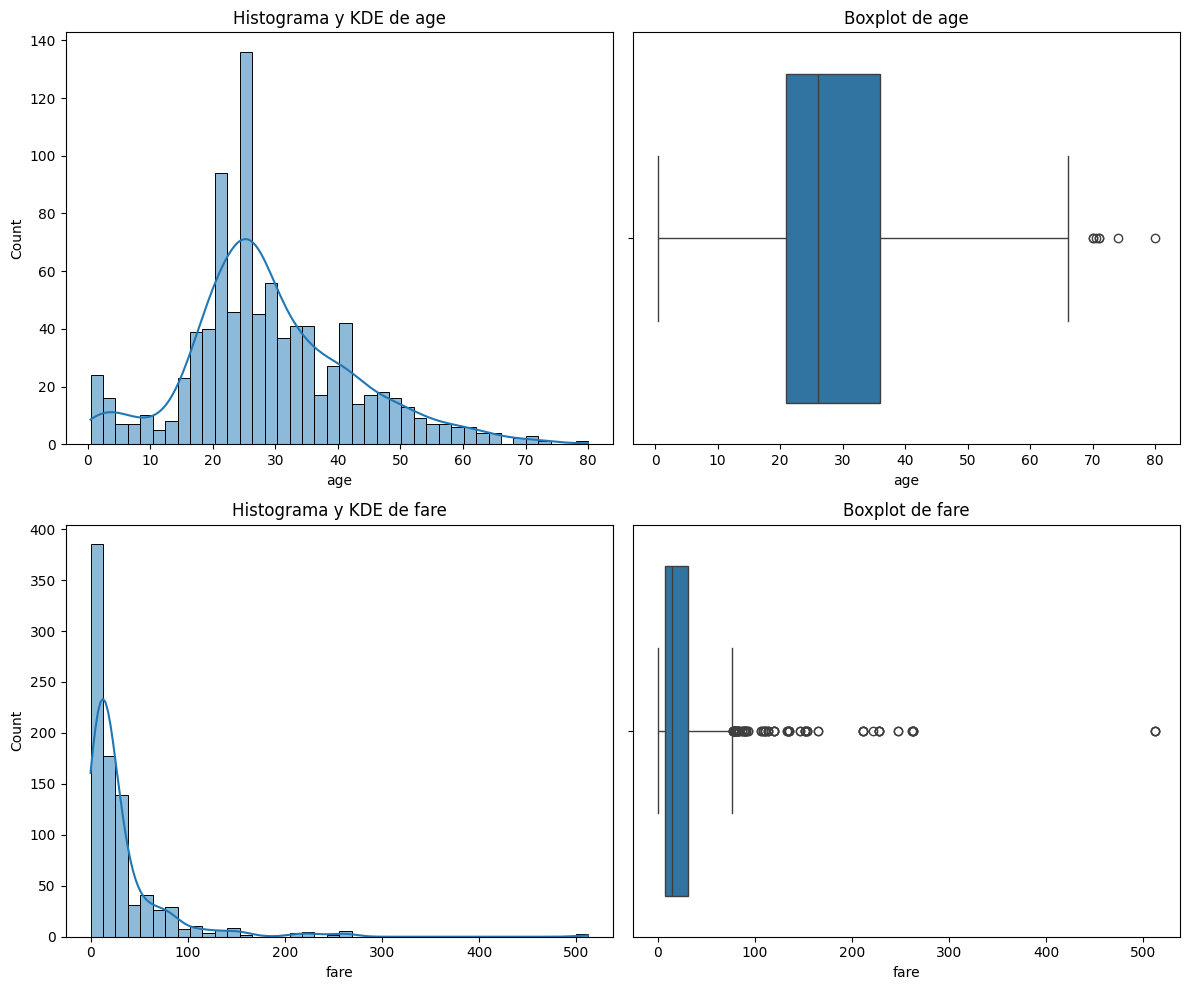

In [34]:
plot_combined_graphs(df_titanic, ["age","fare"], whisker_width=2, bins = 40)